In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("hepatitis_new.xlsx", header=None)
data.drop(0, inplace=True, axis=1)
data.drop(0, inplace=True, axis=0)
data.columns = data.iloc[0]
data.drop(1, inplace=True, axis=0)
data.columns = [c.replace(' ', '_') for c in data.columns]
data = data.replace(to_replace=['no', 'yes'], value=[0, 1])
data.CLASS = data.CLASS.replace(to_replace=['Live', 'Die'], value=[0, 1])
data = data.replace(to_replace=['?'], value=np.nan)
data = data.reset_index()
X_temp = data.drop(columns=['CLASS'])
X_temp

,index,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Speiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,NaN,0
1,3,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,NaN,0
2,4,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,NaN,0
3,5,31,0,NaN,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,6,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,200.0,4.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,152,46,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,NaN,242.0,3.3,50.0,1
151,153,44,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,NaN,1
152,154,61,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,NaN,1
153,155,53,1,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1


In [3]:
y = data['CLASS'].values
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1], dtype=int64)

In [4]:
X = data.groupby("CLASS").transform(lambda x: x.fillna(x.mean()))
X

,index,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Speiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,1,0.000000,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.000000,18.0,4.0,66.571429,0
1,3,50,0,0.000000,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.000000,42.0,3.5,66.571429,0
2,4,78,0,1.000000,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.000000,32.0,4.0,66.571429,0
3,5,31,0,0.540984,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.000000,52.0,4.0,80.000000,0
4,6,34,0,1.000000,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,101.313725,200.0,4.0,66.571429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,152,46,0,1.000000,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,122.375000,242.0,3.3,50.000000,1
151,153,44,0,1.000000,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.000000,142.0,4.3,66.571429,1
152,154,61,0,0.000000,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.000000,20.0,4.1,66.571429,1
153,155,53,1,0.000000,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.000000,19.0,4.1,48.000000,1


In [5]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

X = scaler.transform(X)
X

array([[-1.7209121 , -0.89419175,  2.94745653, ...,  0.30720513,
         0.26151157, -0.90748521],
       [-1.69856259,  0.70257923, -0.33927557, ..., -0.48942799,
         0.26151157, -0.90748521],
       [-1.67621309,  2.93805862, -0.33927557, ...,  0.30720513,
         0.26151157, -0.90748521],
       ...,
       [ 1.67621309,  1.58080328, -0.33927557, ...,  0.46653176,
         0.26151157,  1.10194633],
       [ 1.69856259,  0.94209488,  2.94745653, ...,  0.46653176,
        -0.75812043,  1.10194633],
       [ 1.7209121 ,  0.14370939, -0.33927557, ..., -1.1267345 ,
        -1.08753999,  1.10194633]])

In [6]:
from sklearn.cluster import KMeans
acc={}
x={}
for i in range (1,155):
    x[i] = i
    #print(i)
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    #print(kmeans.labels_)
    
    # Accuracy
    from sklearn.metrics import accuracy_score
    acc[i] = accuracy_score(y, kmeans.labels_)
    print(x[i], "Accuracy: ", acc[i]*100)

1 Accuracy:  79.35483870967742
2 Accuracy:  79.35483870967742
3 Accuracy:  61.935483870967744
4 Accuracy:  8.38709677419355
5 Accuracy:  23.225806451612904
6 Accuracy:  20.64516129032258
7 Accuracy:  17.419354838709676
8 Accuracy:  14.193548387096774
9 Accuracy:  13.548387096774196
10 Accuracy:  12.258064516129032
11 Accuracy:  8.38709677419355
12 Accuracy:  6.451612903225806
13 Accuracy:  6.451612903225806
14 Accuracy:  5.161290322580645
15 Accuracy:  0.6451612903225806
16 Accuracy:  0.6451612903225806
17 Accuracy:  3.870967741935484
18 Accuracy:  0.6451612903225806
19 Accuracy:  2.5806451612903225
20 Accuracy:  1.935483870967742
21 Accuracy:  9.67741935483871
22 Accuracy:  9.67741935483871
23 Accuracy:  7.741935483870968
24 Accuracy:  7.741935483870968
25 Accuracy:  3.225806451612903
26 Accuracy:  3.225806451612903
27 Accuracy:  3.225806451612903
28 Accuracy:  1.2903225806451613
29 Accuracy:  0.6451612903225806
30 Accuracy:  0.6451612903225806
31 Accuracy:  1.2903225806451613
32 Accu

{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120: 120, 121: 121, 122: 

TypeError: float() argument must be a string or a number, not 'dict'

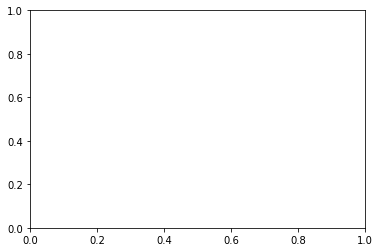

In [10]:
import matplotlib.pyplot as plt


#x = np.linspace(1,155,155)
for i in range (1,155):
    print(x)
    print(acc)

plt.plot(x, acc)
print(acc)
plt.show()


# ELBOW METHOD

In [21]:
import pandas as pd
import numpy as np

In [22]:
data = pd.read_excel("hepatitis_new.xlsx", header=None)
data.drop(0, inplace=True, axis=1)
data.drop(0, inplace=True, axis=0)
data.columns = data.iloc[0]
data.drop(1, inplace=True, axis=0)
data.columns = [c.replace(' ', '_') for c in data.columns]
data = data.replace(to_replace=['no', 'yes'], value=[0, 1])
data.CLASS = data.CLASS.replace(to_replace=['Live', 'Die'], value=[0, 1])
data = data.replace(to_replace=['?'], value=np.nan)
data = data.reset_index()
X_temp = data.drop(columns=['CLASS'])
X_temp

,index,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Speiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,NaN,0
1,3,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,NaN,0
2,4,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,NaN,0
3,5,31,0,NaN,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,6,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,200.0,4.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,152,46,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,NaN,242.0,3.3,50.0,1
151,153,44,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,NaN,1
152,154,61,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,NaN,1
153,155,53,1,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1


In [23]:
y = data['CLASS'].values
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1], dtype=int64)

In [24]:
X = data.groupby("CLASS").transform(lambda x: x.fillna(x.mean()))
X

,index,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Speiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,1,0.000000,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.000000,18.0,4.0,66.571429,0
1,3,50,0,0.000000,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.000000,42.0,3.5,66.571429,0
2,4,78,0,1.000000,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.000000,32.0,4.0,66.571429,0
3,5,31,0,0.540984,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.000000,52.0,4.0,80.000000,0
4,6,34,0,1.000000,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,101.313725,200.0,4.0,66.571429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,152,46,0,1.000000,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,122.375000,242.0,3.3,50.000000,1
151,153,44,0,1.000000,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.000000,142.0,4.3,66.571429,1
152,154,61,0,0.000000,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.000000,20.0,4.1,66.571429,1
153,155,53,1,0.000000,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.000000,19.0,4.1,48.000000,1


In [25]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

X = scaler.transform(X)
X

array([[-1.7209121 , -0.89419175,  2.94745653, ...,  0.30720513,
         0.26151157, -0.90748521],
       [-1.69856259,  0.70257923, -0.33927557, ..., -0.48942799,
         0.26151157, -0.90748521],
       [-1.67621309,  2.93805862, -0.33927557, ...,  0.30720513,
         0.26151157, -0.90748521],
       ...,
       [ 1.67621309,  1.58080328, -0.33927557, ...,  0.46653176,
         0.26151157,  1.10194633],
       [ 1.69856259,  0.94209488,  2.94745653, ...,  0.46653176,
        -0.75812043,  1.10194633],
       [ 1.7209121 ,  0.14370939, -0.33927557, ..., -1.1267345 ,
        -1.08753999,  1.10194633]])

In [38]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range (1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    Y = Sum_of_squared_distances.append(kmeans.inertia_)
    #print(kmeans)
    print(kmeans.inertia_)
    #print(Sum_of_squared_distances)

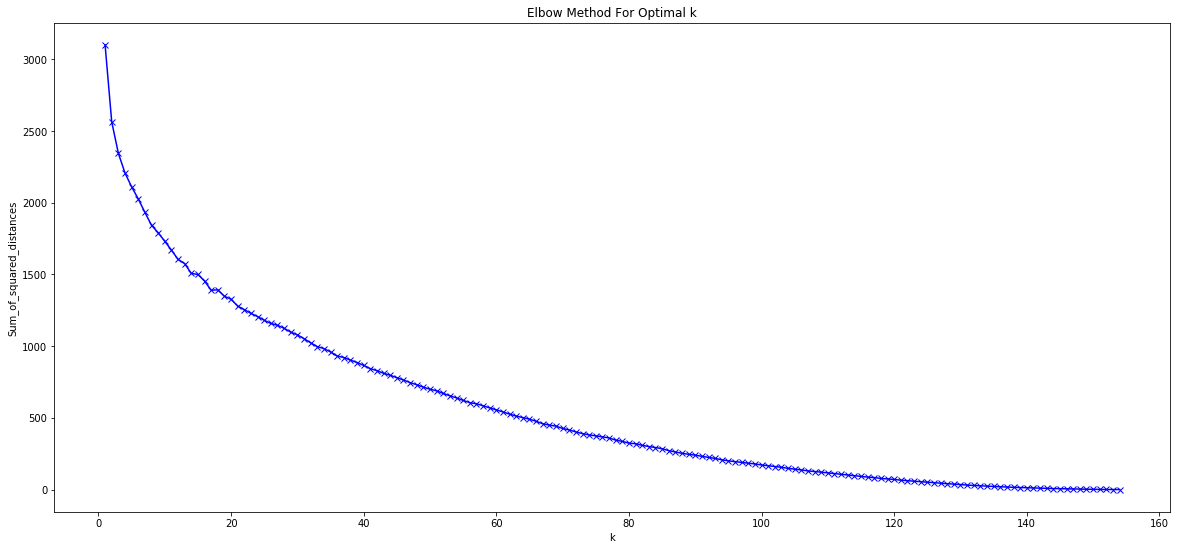

In [65]:
plt.figure(figsize=(20, 9))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [40]:
from kneed import DataGenerator, KneeLocator

kl = KneeLocator(K, Sum_of_squared_distances, curve="convex", direction="decreasing")
print('Optimal k is: ',kl.elbow)

Optimal k is:  3


# Silhouette  METHOD

In [20]:
import pandas as pd
import numpy as np

In [21]:
data = pd.read_excel("hepatitis_new.xlsx", header=None)
data.drop(0, inplace=True, axis=1)
data.drop(0, inplace=True, axis=0)
data.columns = data.iloc[0]
data.drop(1, inplace=True, axis=0)
data.columns = [c.replace(' ', '_') for c in data.columns]
data = data.replace(to_replace=['no', 'yes'], value=[0, 1])
data.CLASS = data.CLASS.replace(to_replace=['Live', 'Die'], value=[0, 1])
data = data.replace(to_replace=['?'], value=np.nan)
data = data.reset_index()
X_temp = data.drop(columns=['CLASS'])
X_temp

,index,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Speiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,NaN,0
1,3,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,NaN,0
2,4,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,NaN,0
3,5,31,0,NaN,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,6,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,200.0,4.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,152,46,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,NaN,242.0,3.3,50.0,1
151,153,44,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,NaN,1
152,154,61,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,NaN,1
153,155,53,1,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1


In [22]:
y = data['CLASS'].values
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1], dtype=int64)

In [23]:
X = data.groupby("CLASS").transform(lambda x: x.fillna(x.mean()))
X

,index,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Speiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,1,0.000000,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.000000,18.0,4.0,66.571429,0
1,3,50,0,0.000000,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.000000,42.0,3.5,66.571429,0
2,4,78,0,1.000000,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.000000,32.0,4.0,66.571429,0
3,5,31,0,0.540984,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.000000,52.0,4.0,80.000000,0
4,6,34,0,1.000000,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,101.313725,200.0,4.0,66.571429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,152,46,0,1.000000,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,122.375000,242.0,3.3,50.000000,1
151,153,44,0,1.000000,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.000000,142.0,4.3,66.571429,1
152,154,61,0,0.000000,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.000000,20.0,4.1,66.571429,1
153,155,53,1,0.000000,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.000000,19.0,4.1,48.000000,1


In [24]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

X = scaler.transform(X)
X

array([[-1.7209121 , -0.89419175,  2.94745653, ...,  0.30720513,
         0.26151157, -0.90748521],
       [-1.69856259,  0.70257923, -0.33927557, ..., -0.48942799,
         0.26151157, -0.90748521],
       [-1.67621309,  2.93805862, -0.33927557, ...,  0.30720513,
         0.26151157, -0.90748521],
       ...,
       [ 1.67621309,  1.58080328, -0.33927557, ...,  0.46653176,
         0.26151157,  1.10194633],
       [ 1.69856259,  0.94209488,  2.94745653, ...,  0.46653176,
        -0.75812043,  1.10194633],
       [ 1.7209121 ,  0.14370939, -0.33927557, ..., -1.1267345 ,
        -1.08753999,  1.10194633]])

In [47]:
for i,k in enumerate ([1,2,3]):
    print(i, k)
print(X)
print()
print(X[0])
print(X[1])

0 1
1 2
2 3
[[-1.7209121  -0.89419175  2.94745653 ...  0.30720513  0.26151157
  -0.90748521]
 [-1.69856259  0.70257923 -0.33927557 ... -0.48942799  0.26151157
  -0.90748521]
 [-1.67621309  2.93805862 -0.33927557 ...  0.30720513  0.26151157
  -0.90748521]
 ...
 [ 1.67621309  1.58080328 -0.33927557 ...  0.46653176  0.26151157
   1.10194633]
 [ 1.69856259  0.94209488  2.94745653 ...  0.46653176 -0.75812043
   1.10194633]
 [ 1.7209121   0.14370939 -0.33927557 ... -1.1267345  -1.08753999
   1.10194633]]

[-1.7209121  -0.89419175  2.94745653 -1.01678723  0.42802583  1.36410317
  0.81131209  0.51336192 -2.26828889  0.87974559  0.50766563  0.72751447
  0.39698567  0.37435181 -0.36462535 -0.44491703 -0.77123706  0.30720513
  0.26151157 -0.90748521]
[-1.69856259  0.70257923 -0.33927557 -1.01678723  0.42802583 -0.73819438
  0.81131209  0.51336192 -2.26828889  0.87974559  0.50766563  0.72751447
  0.39698567  0.37435181 -0.44851379  0.63174557 -0.49915301 -0.48942799
  0.26151157 -0.90748521]


1
2
3
4


ValueError: 'c' argument has 155 elements, which is not acceptable for use with 'x' with size 20, 'y' with size 20.

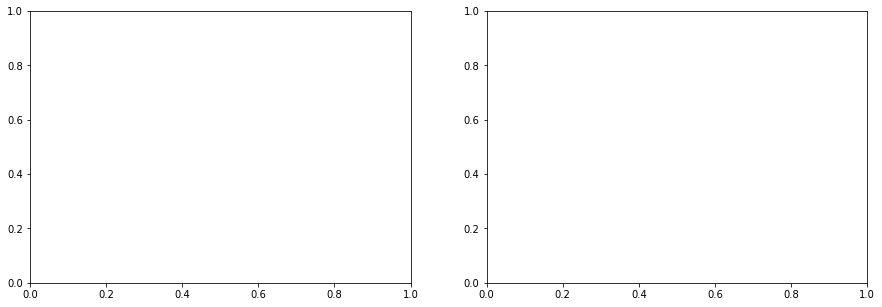

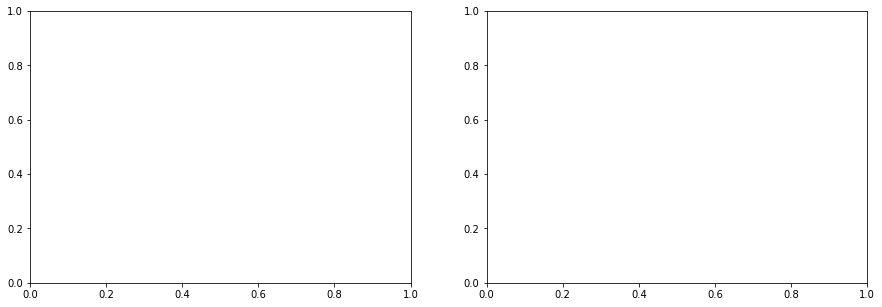

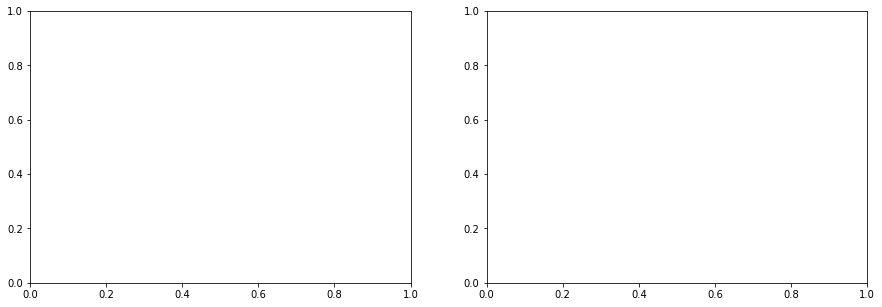

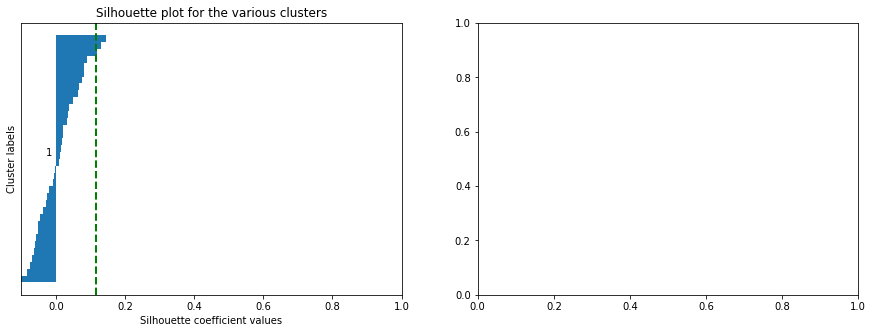

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt

K = range (1,5)
for k in K:
    print(k)
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Run the kmeans algorithm
    km = KMeans(n_clusters=k)
    y_predict = km.fit_predict(X)
    centroids  = km.cluster_centers_

# get silhouette
silhouette_vals = silhouette_samples(X,y_predict)

# silhouette plot
y_ticks = []
y_lower = y_upper = 0

for i,cluster in enumerate(np.unique(y_predict)):
    cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
   
    ax[0].barh(range(y_lower,y_upper),
    cluster_silhouette_vals,height =1);
    ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
    y_lower += len(cluster_silhouette_vals)
       
    # Get the average silhouette score 
    avg_score = np.mean(silhouette_vals)
    ax[0].axvline(avg_score,linestyle ='--',
    linewidth =2,color = 'green')
    ax[0].set_yticks([])
    ax[0].set_xlim([-0.1, 1])
    ax[0].set_xlabel('Silhouette coefficient values')
    ax[0].set_ylabel('Cluster labels')
    ax[0].set_title('Silhouette plot for the various clusters');
    
    
    # scatter plot of data colored with labels
    
    ax[1].scatter(X[0], X[1] , c = y_predict);
    ax[1].scatter(centroids[:,0],centroids[:,1],
    marker = '*' , c= 'r',s =250);
    ax[1].set_xlabel('Eruption time in mins')
    ax[1].set_ylabel('Waiting time to next eruption')
    ax[1].set_title('Visualization of clustered data', y=1.02)
    
    plt.tight_layout()
    plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')
    plt.savefig(f'Silhouette_analysis_{k}.jpg')

# FINAL - Elbow Clustering

# 1. Convert that data into the numerical values

In [49]:
import pandas as pd
import numpy as np

data = pd.read_excel("hepatitis_new.xlsx", header=None)
data.drop(0, inplace=True, axis=1)
data.drop(0, inplace=True, axis=0)
data.columns = data.iloc[0]
data.drop(1, inplace=True, axis=0)
data.columns = [c.replace(' ', '_') for c in data.columns]
data = data.replace(to_replace=['no', 'yes'], value=[0, 1])
data.CLASS = data.CLASS.replace(to_replace=['Live', 'Die'], value=[0, 1])
data = data.replace(to_replace=['?'], value=np.nan)
data = data.reset_index()
X_temp = data.drop(columns=['CLASS'])
X_temp

,index,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Speiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,NaN,0
1,3,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,NaN,0
2,4,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,NaN,0
3,5,31,0,NaN,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,6,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,200.0,4.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,152,46,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,NaN,242.0,3.3,50.0,1
151,153,44,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,NaN,1
152,154,61,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,NaN,1
153,155,53,1,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1


# 2. Impute the missing data with the mean values of same attribute in the same class

In [50]:
X = data.groupby("CLASS").transform(lambda x: x.fillna(x.mean()))
X

,index,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Speiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,1,0.000000,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.000000,18.0,4.0,66.571429,0
1,3,50,0,0.000000,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.000000,42.0,3.5,66.571429,0
2,4,78,0,1.000000,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.000000,32.0,4.0,66.571429,0
3,5,31,0,0.540984,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.000000,52.0,4.0,80.000000,0
4,6,34,0,1.000000,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,101.313725,200.0,4.0,66.571429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,152,46,0,1.000000,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,122.375000,242.0,3.3,50.000000,1
151,153,44,0,1.000000,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.000000,142.0,4.3,66.571429,1
152,154,61,0,0.000000,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.000000,20.0,4.1,66.571429,1
153,155,53,1,0.000000,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.000000,19.0,4.1,48.000000,1


In [51]:
y = data['CLASS'].values
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1], dtype=int64)

# 3. Hide the class label of the supervised data

# 4. Normalize the data

In [52]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

X = scaler.transform(X)
X

array([[-1.7209121 , -0.89419175,  2.94745653, ...,  0.30720513,
         0.26151157, -0.90748521],
       [-1.69856259,  0.70257923, -0.33927557, ..., -0.48942799,
         0.26151157, -0.90748521],
       [-1.67621309,  2.93805862, -0.33927557, ...,  0.30720513,
         0.26151157, -0.90748521],
       ...,
       [ 1.67621309,  1.58080328, -0.33927557, ...,  0.46653176,
         0.26151157,  1.10194633],
       [ 1.69856259,  0.94209488,  2.94745653, ...,  0.46653176,
        -0.75812043,  1.10194633],
       [ 1.7209121 ,  0.14370939, -0.33927557, ..., -1.1267345 ,
        -1.08753999,  1.10194633]])

# 5. Apply the automatic clustering. How many clusters are created? - Elbow Method

In [57]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range (1,len(y))
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    Y = Sum_of_squared_distances.append(kmeans.inertia_)
    #print(kmeans)
    print("K:", k, ", Sum_of_squared_distances:", kmeans.inertia_)
    #print(Sum_of_squared_distances)

K: 1 , Sum_of_squared_distances: 3100.0
K: 2 , Sum_of_squared_distances: 2563.1880351556065
K: 3 , Sum_of_squared_distances: 2344.4084991183263
K: 4 , Sum_of_squared_distances: 2206.809317329538
K: 5 , Sum_of_squared_distances: 2110.2154065429067
K: 6 , Sum_of_squared_distances: 2026.183904664447
K: 7 , Sum_of_squared_distances: 1932.5104090968682
K: 8 , Sum_of_squared_distances: 1842.1888752072994
K: 9 , Sum_of_squared_distances: 1790.3183684827495
K: 10 , Sum_of_squared_distances: 1730.8361247386383
K: 11 , Sum_of_squared_distances: 1669.4937009163148
K: 12 , Sum_of_squared_distances: 1604.5200690111237
K: 13 , Sum_of_squared_distances: 1574.7286439186155
K: 14 , Sum_of_squared_distances: 1506.8996167161922
K: 15 , Sum_of_squared_distances: 1499.2873642735221
K: 16 , Sum_of_squared_distances: 1453.1393319666813
K: 17 , Sum_of_squared_distances: 1389.3728038949735
K: 18 , Sum_of_squared_distances: 1392.2171550277717
K: 19 , Sum_of_squared_distances: 1347.2949483729005
K: 20 , Sum_of_s

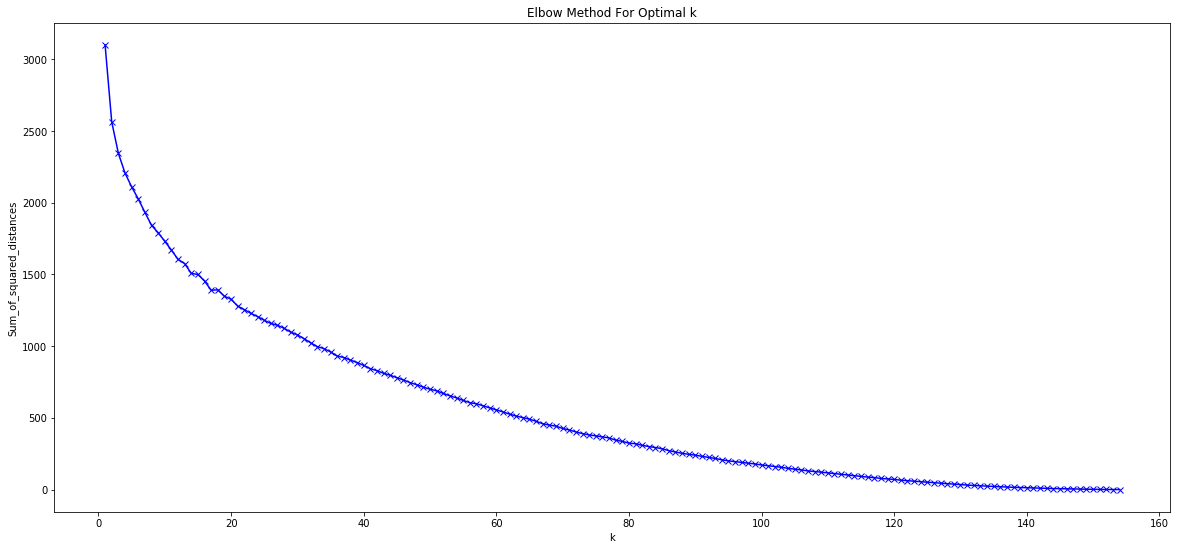

In [66]:
plt.figure(figsize=(20, 9))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [78]:
from kneed import KneeLocator

k_opt = KneeLocator(K, Sum_of_squared_distances, curve="convex", direction="decreasing")
print('Optimal k is: ',k_opt.elbow)

Optimal k is:  17


# 6. Compare the clusters and the original classes of the dataset

In [75]:
# Optimal K

kmeans = KMeans(n_clusters=k_opt.elbow, random_state=0).fit(X)
kmeans.labels_

array([14,  0, 12,  1,  1,  1,  4,  1, 12,  1,  0,  9,  9, 12,  9, 15, 12,
       12,  1,  0, 14,  4,  1,  1, 14, 12,  9,  6,  0,  9,  9,  9, 14, 14,
       12, 12, 12,  4,  1,  8,  9,  1,  1, 12,  1, 12,  1,  6,  1,  9,  1,
        1,  1,  9, 12, 11, 12,  1,  0,  6,  1,  1, 13,  4, 12,  1,  1,  8,
       12, 12,  1,  2, 12, 11,  1,  9,  4, 14,  2,  1, 12,  1,  1,  6,  6,
       11,  7,  3,  3, 11,  4, 13,  5,  5,  2, 11,  2,  2,  5,  2,  3,  5,
        5, 13,  3,  5, 15, 10,  0, 15, 16,  9,  5,  4,  5,  6,  5,  5,  2,
        2,  2,  8,  5,  5,  5,  2,  8,  7, 15, 15,  5, 13,  8,  9, 16,  7,
        2,  7,  3,  5,  3, 15,  7, 15,  8,  5,  7, 10,  5,  5, 13,  5,  2,
        7,  8])

In [76]:
# Original Classes
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1], dtype=int64)

In [77]:
# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, kmeans.labels_)
error = (1-acc)*100
print("Error: ", error)

Error:  96.12903225806451


# Analysis

K: 1 , Sum_of_squared_distances: 3100.0
K: 2 , Sum_of_squared_distances: 2563.1880351556065
K: 3 , Sum_of_squared_distances: 2344.4084991183263
K: 4 , Sum_of_squared_distances: 2206.809317329538
K: 5 , Sum_of_squared_distances: 2110.2154065429067
K: 6 , Sum_of_squared_distances: 2026.183904664447
K: 7 , Sum_of_squared_distances: 1932.5104090968682
K: 8 , Sum_of_squared_distances: 1842.1888752072994
K: 9 , Sum_of_squared_distances: 1790.3183684827495
K: 10 , Sum_of_squared_distances: 1730.8361247386383


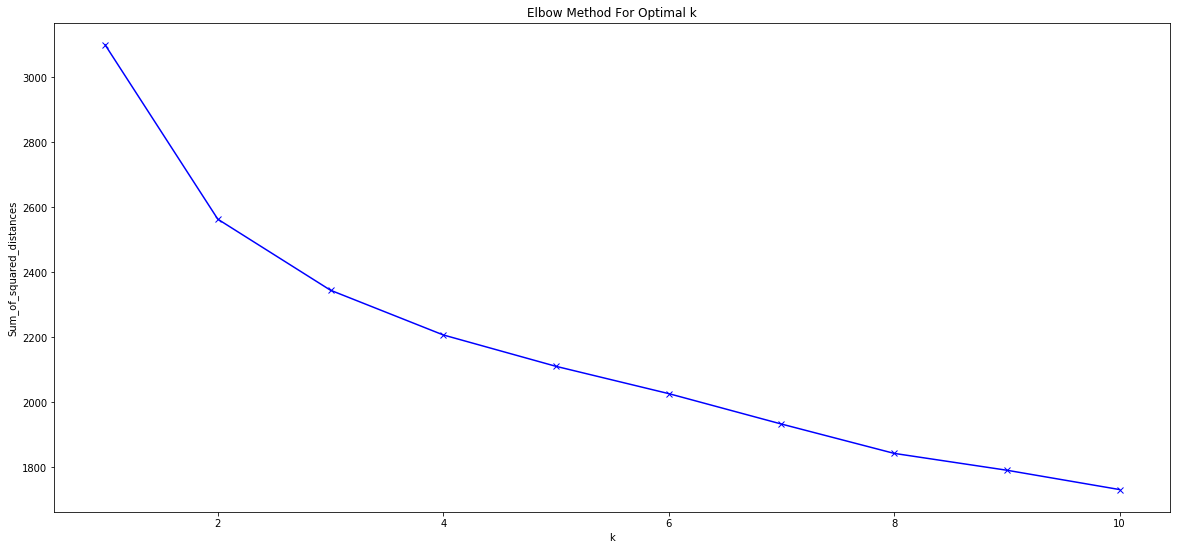

Optimal k is:  3
Error:  87.74193548387098


In [82]:
Sum_of_squared_distances = []
K = range (1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    Y = Sum_of_squared_distances.append(kmeans.inertia_)
    #print(kmeans)
    print("K:", k, ", Sum_of_squared_distances:", kmeans.inertia_)
    #print(Sum_of_squared_distances)
    
plt.figure(figsize=(20, 9))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

k_opt = KneeLocator(K, Sum_of_squared_distances, curve="convex", direction="decreasing")
print('Optimal k is: ',k_opt.elbow)

# Accuracy
acc = accuracy_score(y, kmeans.labels_)
error = (1-acc)*100
print("Error: ", error)